# load data


In [1]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
cd gdrive/Shareddrives/Hasenstab\ Lab/Data/COPDGene

/content/gdrive/.shortcut-targets-by-id/1_8lvU9zykqyOnIywfng84LfyYcKfpDvM/COPDGene


In [3]:
ls

COPDGene_P1P2P3_SM_NS_Long_Mar20.csv
COPDGene_P1P2P3_Visitlevel_DataDict_Mar20_inprogress.xlsx
forKyle_days_followed_mortality_06.04.22.csv
forKyle_years_followed_ExacHospER_06.04.22.csv
forKyle_years_followed_ExacHospER_08.09.22.csv
histograms/
image_dims_volume_all.csv
lung_measurements.csv
masks/
mask_vmLung_test/
phase1/
subjects_change_in_P1_P2_FEV1_mL.csv
subjects_exac_hosp_ER.csv
tmp.h5
univariate_histograms/


In [4]:
pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# includes
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import nilearn as nil
import tensorflow as tf

# random seeds
np.random.seed(16)
tf.random.set_seed(16)

In [6]:
dataset_input_name = "insp_ct"
dataset_output_name = "exp_ct_deform"

In [7]:
CTscanInsp = nib.load(f'masks/12437D/{dataset_input_name}.nii')
CTscanExpDeform = nib.load(f'masks/12437D/{dataset_output_name}.nii')


In [8]:
CTscanDataInsp = CTscanInsp.get_fdata()
CTscanDataExpDeform = CTscanExpDeform.get_fdata()


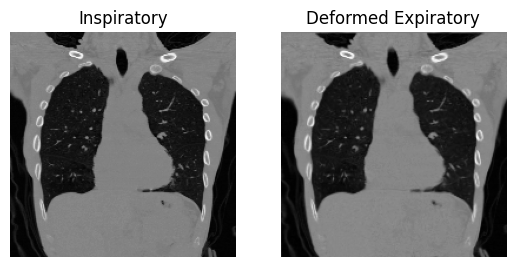

In [9]:
# plot middle slice image
i, j, k = np.array(CTscanDataInsp.shape) // 2
fig, axes = plt.subplots(1,2)

axes[0].imshow(CTscanDataInsp[i,:,:].T, cmap='Greys_r', origin='lower')
axes[0].set_title('Inspiratory')
axes[0].axis('off')

axes[1].imshow(CTscanDataExpDeform[i,:,:].T, cmap='Greys_r', origin='lower')
axes[1].set_title('Deformed Expiratory')
axes[1].axis('off')

# save middle slice to work further
inputImage = CTscanDataInsp[i,:,:].T
targetImage = CTscanDataExpDeform[i,:,:].T

In [10]:
#plt.imshow(inputImage, cmap='Greys_r', origin='lower')
inputImage.shape

(192, 192)

In [11]:
ls

COPDGene_P1P2P3_SM_NS_Long_Mar20.csv
COPDGene_P1P2P3_Visitlevel_DataDict_Mar20_inprogress.xlsx
forKyle_days_followed_mortality_06.04.22.csv
forKyle_years_followed_ExacHospER_06.04.22.csv
forKyle_years_followed_ExacHospER_08.09.22.csv
histograms/
image_dims_volume_all.csv
lung_measurements.csv
masks/
mask_vmLung_test/
phase1/
subjects_change_in_P1_P2_FEV1_mL.csv
subjects_exac_hosp_ER.csv
tmp.h5
univariate_histograms/


Build an input pipeline with image paths

In [12]:
# get image pathes for input and target images
import os
#from tqdm import tqdm

root_directory = 'masks/'  # Replace with the actual path to your root directory
inputImageName = ('insp_ct.nii')
outputImageName = ('exp_ct_deform.nii')  # Extensions of the target image files

def search_images(directory, image_list, name):
  for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(name):
                image_path = os.path.join(root, file)
                image_list.append(image_path.replace('\0', ''))  # Add the image path to the list, replace termination character

# Create an empty list to store image paths
inputImagePath = []
outputImagePath = []

# Call the search_image function with the root directory
search_images(root_directory, inputImagePath, inputImageName)
search_images(root_directory, outputImagePath, outputImageName)

if inputImagePath:
    print("Image input paths:")
    for path in inputImagePath[:10]:
        print(path)
else:
    print("No image files found in the directory tree.")

if outputImagePath:
    print("Image ouput paths:")
    for path in outputImagePath[:10]:
        print(path)
else:
    print("No image files found in the directory tree.")

Image input paths:
masks/25561Z/insp_ct.nii
masks/25583J/insp_ct.nii
masks/25572E/insp_ct.nii
masks/25588T/insp_ct.nii
masks/25595Q/insp_ct.nii
masks/25590G/insp_ct.nii
masks/25584L/insp_ct.nii
masks/25581F/insp_ct.nii
masks/25575K/insp_ct.nii
masks/25593M/insp_ct.nii
Image ouput paths:
masks/25561Z/exp_ct_deform.nii
masks/25583J/exp_ct_deform.nii
masks/25572E/exp_ct_deform.nii
masks/25588T/exp_ct_deform.nii
masks/25595Q/exp_ct_deform.nii
masks/25590G/exp_ct_deform.nii
masks/25584L/exp_ct_deform.nii
masks/25581F/exp_ct_deform.nii
masks/25575K/exp_ct_deform.nii
masks/25593M/exp_ct_deform.nii


In [13]:
from sklearn.model_selection import train_test_split

# Convert image paths to lists
inputImagePath = list(inputImagePath)
outputImagePath = list(outputImagePath)

# Split the data into training and test sets
train_input, test_input, train_output, test_output = train_test_split(
    inputImagePath, outputImagePath, test_size=0.2, random_state=42
)

if train_input:
    print("Image input paths:")
    for path in train_input[:10]:
        print(path)
else:
    print("No image files found in the directory tree.")

if train_output:
    print("Image ouput paths:")
    for path in train_output[:10]:
        print(path)
else:
    print("No image files found in the directory tree.")

Image input paths:
masks/12437D/insp_ct.nii
masks/12955Z/insp_ct.nii
masks/22475R/insp_ct.nii
masks/16592J/insp_ct.nii
masks/12576R/insp_ct.nii
masks/15088T/insp_ct.nii
masks/23547V/insp_ct.nii
masks/22068E/insp_ct.nii
masks/19936E/insp_ct.nii
masks/11766R/insp_ct.nii
Image ouput paths:
masks/12437D/exp_ct_deform.nii
masks/12955Z/exp_ct_deform.nii
masks/22475R/exp_ct_deform.nii
masks/16592J/exp_ct_deform.nii
masks/12576R/exp_ct_deform.nii
masks/15088T/exp_ct_deform.nii
masks/23547V/exp_ct_deform.nii
masks/22068E/exp_ct_deform.nii
masks/19936E/exp_ct_deform.nii
masks/11766R/exp_ct_deform.nii


masks/12437D/insp_ct.nii


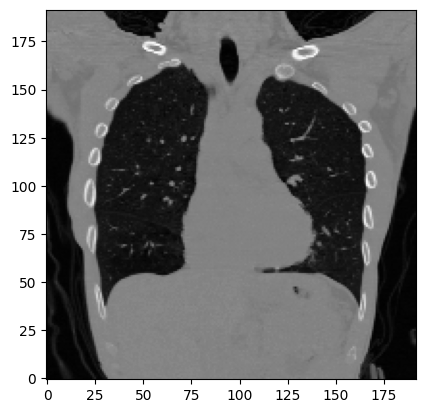

In [14]:
print(train_input[0])
image_dataX = nib.load(train_input[0])
image = image_dataX.get_fdata()
i,j,k = np.array(image.shape) // 2  # Assuming you want the middle slice along the first axis
plt.imshow(image[i, :, :].T, cmap='Greys_r', origin='lower')
plt.show()

In [15]:
image_data = np.array(image)

pixel_min = image_data.min()
pixel_max = image_data.max()

# Print the pixel range
print("Pixel range: {} - {}".format(pixel_min, pixel_max))

Pixel range: -1058.5582275390625 - 1866.5697021484375


In [16]:
ls

COPDGene_P1P2P3_SM_NS_Long_Mar20.csv
COPDGene_P1P2P3_Visitlevel_DataDict_Mar20_inprogress.xlsx
forKyle_days_followed_mortality_06.04.22.csv
forKyle_years_followed_ExacHospER_06.04.22.csv
forKyle_years_followed_ExacHospER_08.09.22.csv
histograms/
image_dims_volume_all.csv
lung_measurements.csv
masks/
mask_vmLung_test/
phase1/
subjects_change_in_P1_P2_FEV1_mL.csv
subjects_exac_hosp_ER.csv
tmp.h5
univariate_histograms/


In [45]:
from skimage.transform import resize

def load_image(file_path):
    print(file_path)
    # load nibable image
    image_data = nib.load(file_path).get_fdata()
    # find middle slice
    i, j, k = np.array(image_data.shape) // 2
    image = image_data[i, :, :].T

    resized_image = resize(image, (256, 256))

    # normalize - [0,2] - [-1,1] for (0,255)
    #image = (resized_image / 127.5) - 1
    pixel_min = resized_image.min()
    pixel_max = resized_image.max()
    image = ((resized_image - pixel_min) / (pixel_max - pixel_min)) * 2 - 1

    return image

# 2D inspiratory to deformed expiratory images pix2pix from scratch

In [18]:
# example of calculating the receptive field for the PatchGAN

# calculate the effective receptive field size
def receptive_field(output_size, kernel_size, stride_size):
    return (output_size - 1) * stride_size + kernel_size

# output layer 1x1 pixel with 4x4 kernel and 1x1 stride
rf = receptive_field(1, 4, 1)
print(rf)
# second last layer with 4x4 kernel and 1x1 stride
rf = receptive_field(rf, 4, 1)
print(rf)
# 3 PatchGAN layers with 4x4 kernel and 2x2 stride
rf = receptive_field(rf, 4, 2)
print(rf)
rf = receptive_field(rf, 4, 2)
print(rf)
rf = receptive_field(rf, 4, 2)
print(rf)

4
7
16
34
70


In [19]:
os.getcwd()
os.chdir("/content/gdrive/My Drive")


# Implement the PatchGAN Discriminator Model


In [20]:
ls

'Colab Notebooks'/              g_model_9_4.h5
 COMP670_Poster-ThKeller.pdf    g_model_weights_46_2.h5
 discriminator_model_plot.png   g_model_weights_9_10.h5
 gan_model_plot.png             g_model_weights_9_2.h5
 generator_model_plot.png       g_model_weights_9_4.h5
 g_model_46_2.h5                peronaMalikEq_5Slides_ThKeller.mov
 g_model_9_10.h5                PeronaMalikEq_blitz_ThKeller.pdf
 g_model_9_2.h5


The model takes two images as input, specifically a source and a target image. These images are concatenated together at the channel level, e.g. 3 color channels of each image become 6 channels of the input.
The PatchGAN configuration is defined using a shorthand notation as: C64-C128-C256-C512, where C refers to a block of Convolution-BatchNorm-LeakyReLU layers and the number indicates the number of filters. Batch normalization is not used in the first layer. As mentioned, the kernel size is fixed at 4×4 and a stride of 2×2 is used on all but the last 2 layers of the model. The slope of the LeakyReLU is set to 0.2, and a sigmoid activation function is used in the output layer.
Model weights were initialized via random Gaussian with a mean of 0.0 and standard deviation of 0.02. Images input to the model are 256×256.
The model is trained with a batch size of one image and the Adam version of stochastic gradient descent is used with a small learning range and modest momentum. The loss for the discriminator is weighted by 50% for each model update.

Tying this all together, we can define a function named define_discriminator() that creates the 70×70 PatchGAN discriminator model.

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


                                                                                                  
 concatenate (Concatenate)      (None, 256, 256, 2)  0           ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 64  2112        ['concatenate[0][0]']            
                                )                                                                 
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 128, 128, 64  0           ['conv2d[0][0]']                 
                                )                                                                 
                                                                                                  
 conv2d_1 

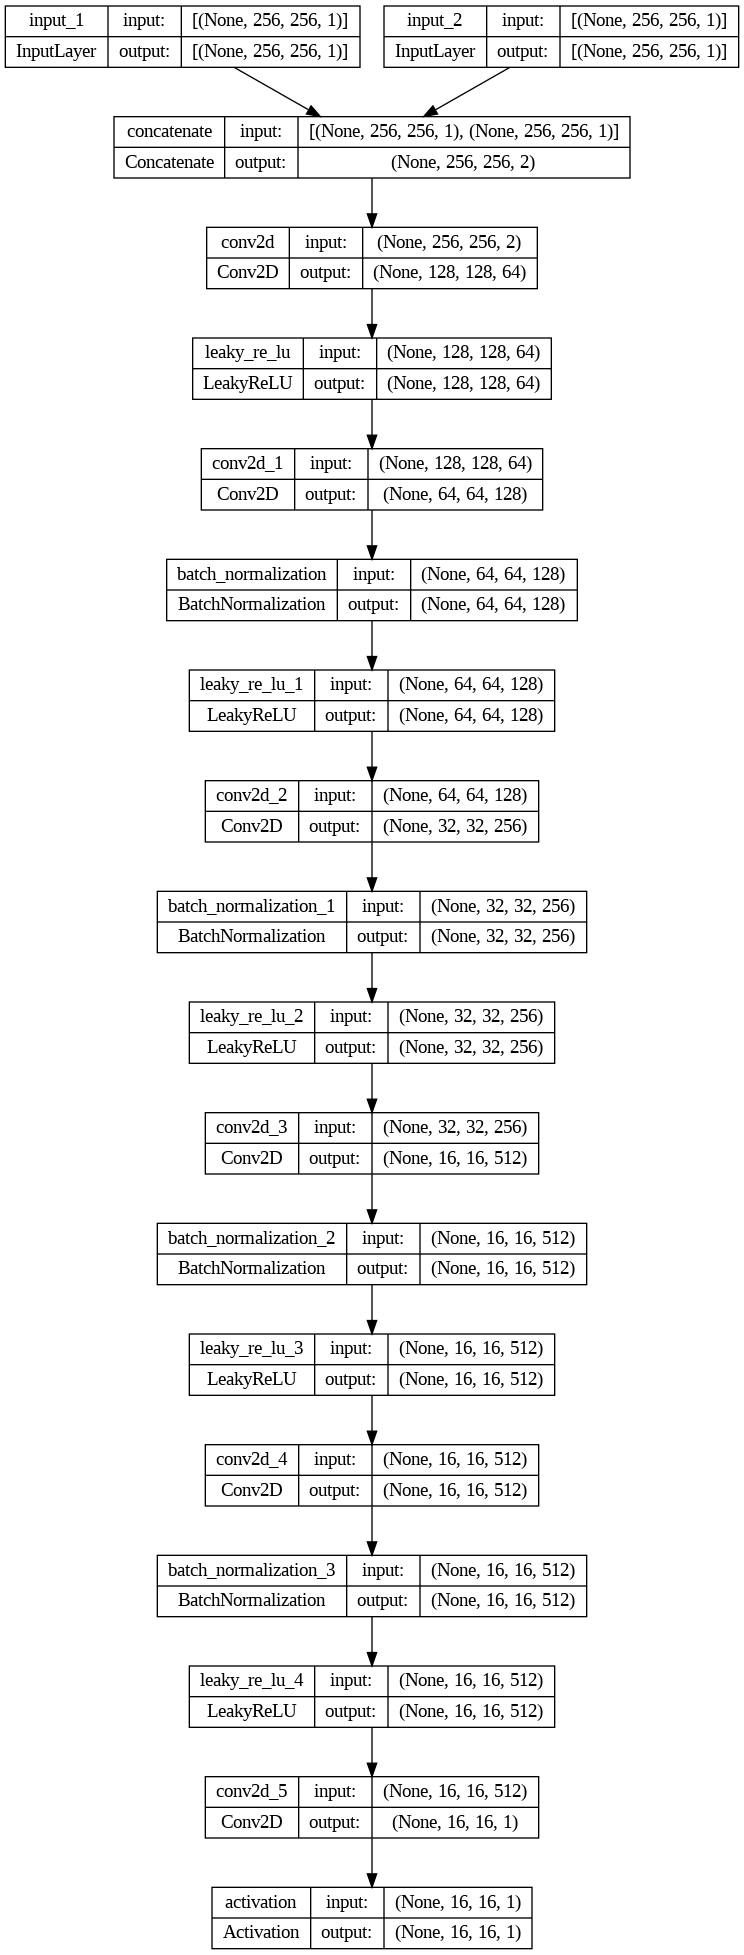

In [21]:
# example of defining a 70x70 patchgan discriminator model
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from tensorflow.keras.layers import Input
from keras.layers import Conv2D
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import BatchNormalization
from keras.utils.vis_utils import plot_model


# define the discriminator model
def define_discriminator(image_shape):
 # weight initialization
 init = RandomNormal(stddev=0.02)
 # source image input
 in_src_image = Input(shape=image_shape)
 # target image input
 in_target_image = Input(shape=image_shape)
 # concatenate images channel-wise
 merged = Concatenate()([in_src_image, in_target_image])
 # C64
 d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
 d = LeakyReLU(alpha=0.2)(d)
 # C128
 d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
 d = BatchNormalization()(d)
 d = LeakyReLU(alpha=0.2)(d)
 # C256
 d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
 d = BatchNormalization()(d)
 d = LeakyReLU(alpha=0.2)(d)
 # C512
 d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
 d = BatchNormalization()(d)
 d = LeakyReLU(alpha=0.2)(d)
 # second last output layer
 d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
 d = BatchNormalization()(d)
 d = LeakyReLU(alpha=0.2)(d)
 # patch output
 d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
 patch_out = Activation('sigmoid')(d)
 # define model
 model = Model([in_src_image, in_target_image], patch_out)
 # compile model
 opt = Adam(learning_rate=0.0002, beta_1=0.5)
 model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])
 return model

# define image shape
image_shape = (256,256,1)
# image_shape = (192,192,3)
# create the model
model = define_discriminator(image_shape)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_model_plot.png', show_shapes=True, show_layer_names=True)

# Implement the U-Net Generator Model

The generator model for the Pix2Pix GAN is implemented as a U-Net.

The U-Net model is an encoder-decoder model for image translation where skip connections are used to connect layers in the encoder with corresponding layers in the decoder that have the same sized feature maps.

The encoder part of the model is comprised of convolutional layers that use a 2×2 stride to downsample the input source image down to a bottleneck layer. The decoder part of the model reads the bottleneck output and uses transpose convolutional layers to upsample to the required output image size.

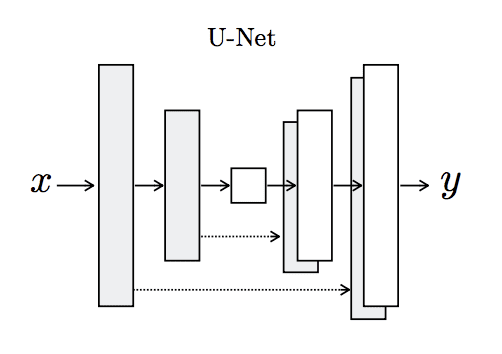

KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 128, 128, 64  1088        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 leaky_re_lu_5 (LeakyReLU)      (None,

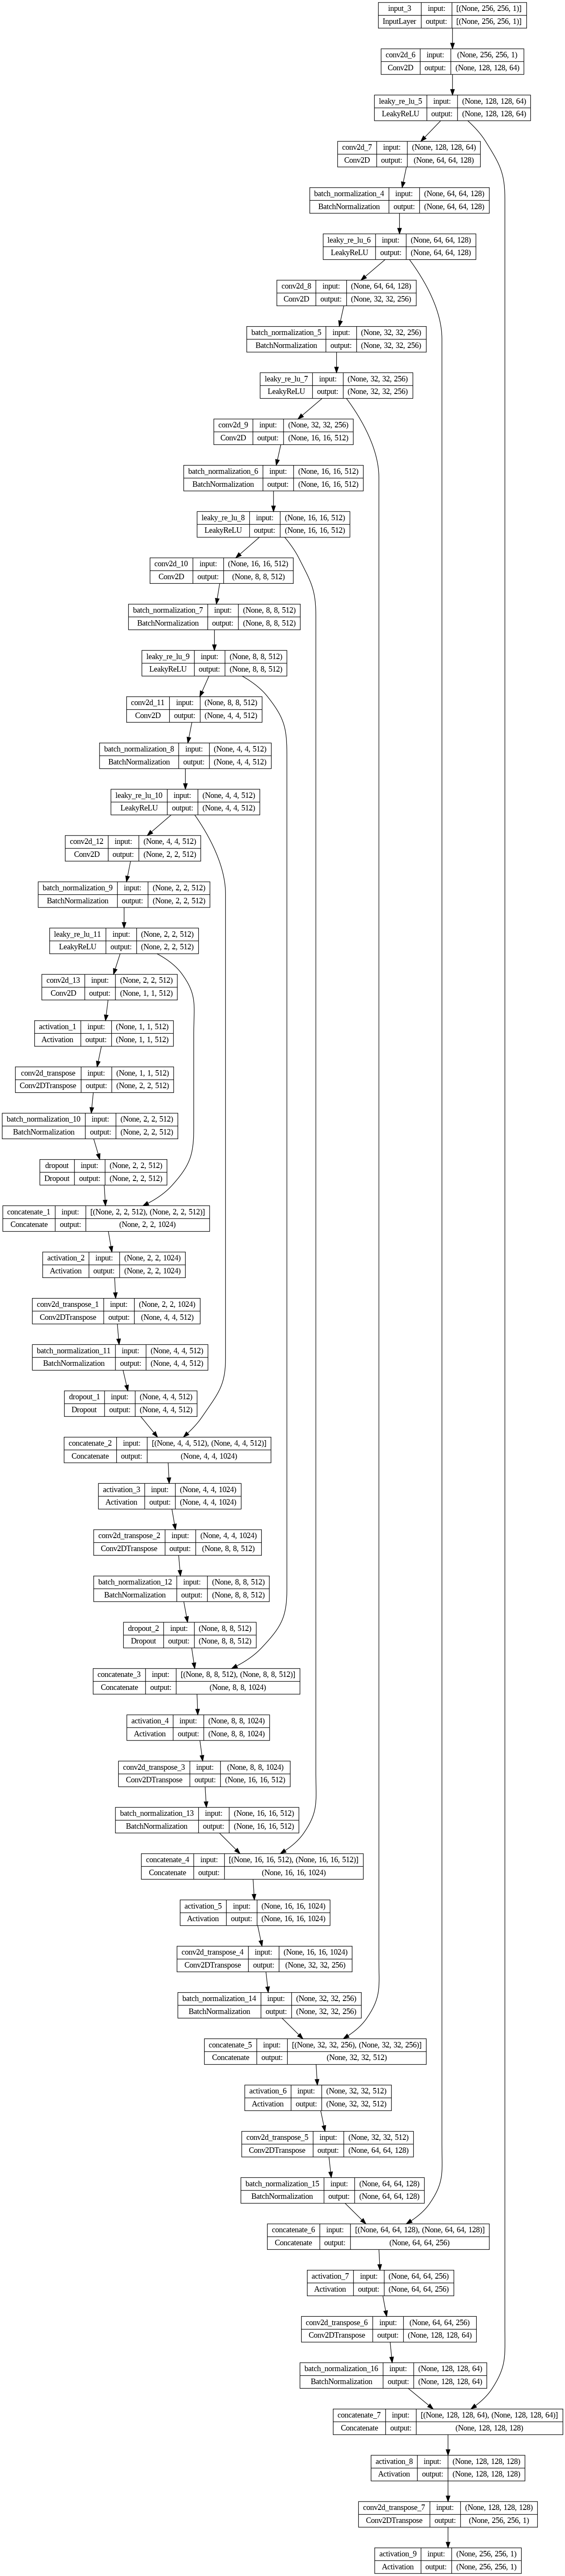

In [22]:
# example of defining a u-net encoder-decoder generator model
from keras.initializers import RandomNormal
from keras.models import Model
from tensorflow.keras.layers import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model

# define an encoder block
def define_encoder_block(layer_in, n_filters, batchnorm=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add downsampling layer
	g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# conditionally add batch normalization
	if batchnorm:
		g = BatchNormalization()(g, training=True)
	# leaky relu activation
	g = LeakyReLU(alpha=0.2)(g)
	return g

# define a decoder block
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add upsampling layer
	g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# add batch normalization
	g = BatchNormalization()(g, training=True)
	# conditionally add dropout
	if dropout:
		g = Dropout(0.5)(g, training=True)
	# merge with skip connection
	g = Concatenate()([g, skip_in])
	# relu activation
	g = Activation('relu')(g)
	return g

# define the standalone generator model
def define_generator(image_shape=(256,256,1)): #image_shape=(256,256,3)
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# encoder model: C64-C128-C256-C512-C512-C512-C512-C512
	e1 = define_encoder_block(in_image, 64, batchnorm=False)
	e2 = define_encoder_block(e1, 128)
	e3 = define_encoder_block(e2, 256)
	e4 = define_encoder_block(e3, 512)
	e5 = define_encoder_block(e4, 512)
	e6 = define_encoder_block(e5, 512)
	e7 = define_encoder_block(e6, 512)
	# bottleneck, no batch norm and relu
	b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
	b = Activation('relu')(b)
	# decoder model: CD512-CD1024-CD1024-C1024-C1024-C512-C256-C128
	d1 = decoder_block(b, e7, 512)
	d2 = decoder_block(d1, e6, 512)
	d3 = decoder_block(d2, e5, 512)
	d4 = decoder_block(d3, e4, 512, dropout=False)
	d5 = decoder_block(d4, e3, 256, dropout=False)
	d6 = decoder_block(d5, e2, 128, dropout=False)
	d7 = decoder_block(d6, e1, 64, dropout=False)
	# output
	g = Conv2DTranspose(1, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7)
	out_image = Activation('tanh')(g)
	# define model
	print(in_image)
	model = Model(in_image, out_image)
	return model

# define image shape
image_shape = (256,256,1)
# image_shape = (192,192,3)
# create the model
model = define_generator(image_shape)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='generator_model_plot.png', show_shapes=True, show_layer_names=True)

# Implement Adversarial and L1 Loss


The discriminator model can be updated directly, whereas the generator model must be updated via the discriminator model.

This can be achieved by defining a new composite model in Keras that connects the output of the generator model as input to the discriminator model. The discriminator model can then predict whether a generated image is real or fake. We can update the weights of the composite model in such a way that the generated image has the label of “real” instead of “fake“, which will cause the generator weights to be updated towards generating a better fake image. We can also mark the discriminator weights as not trainable in this context, to avoid the misleading update.

Additionally, the generator needs to be updated to better match the targeted translation of the input image. This means that the composite model must also output the generated image directly, allowing it to be compared to the target image.

Therefore, we can summarize the inputs and outputs of this composite model as follows:

Inputs: Source image
Outputs: Classification of real/fake, generated target image.
The weights of the generator will be updated via both adversarial loss via the discriminator output and L1 loss via the direct image output. The loss scores are added together, where the L1 loss is treated as a regularizing term and weighted via a hyperparameter called lambda, set to 100.

loss = adversarial loss + lambda * L1 loss

In [23]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model, image_shape):
  # make weights in the discriminator not trainable
  for layer in d_model.layers:
    if not isinstance(layer, BatchNormalization):
      layer.trainable = False
      # define the source image
      in_src = Input(shape=image_shape)
      # connect the source image to the generator input
      gen_out = g_model(in_src)
      # connect the source input and generator output to the discriminator input
      dis_out = d_model([in_src, gen_out])
      # src image as input, generated image and classification output
      model = Model(in_src, [dis_out, gen_out])
      # compile model
      opt = Adam(learning_rate=0.0002, beta_1=0.5)
      model.compile(loss=['binary_crossentropy', 'mae'], optimizer=opt, loss_weights=[1,100])
      return model

KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name='input_6'), name='input_6', description="created by layer 'input_6'")
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 model_3 (Functional)           (None, 256, 256, 1)  54423169    ['input_7[0][0]']                
                                                                                                  
 model_2 (Functional)           (None, 16, 16, 1)    6964161     ['input_7[0][0]',                
                                      

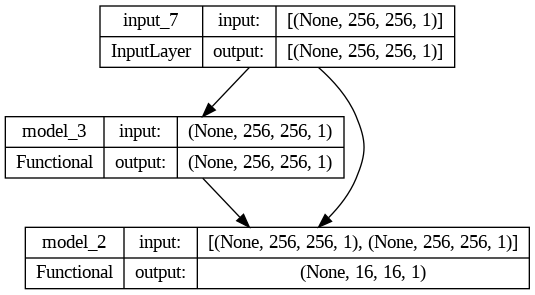

In [24]:
# define image shape
# image_shape = (192,192,3)
image_shape = (256,256,1)
# define the models
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)
# define the composite model
gan_model = define_gan(g_model, d_model, image_shape)
# summarize the model
gan_model.summary()
# plot the model
plot_model(gan_model, to_file='gan_model_plot.png', show_shapes=True, show_layer_names=True)

In [25]:
#d_model.summary()
#g_model.summary()
#d_model.predict([np.array(train_input_images), np.array(train_input_images)])
#np.array(train_input_images).shape

# Update Model Weights

In [26]:
#from random import randint
from random import sample

# select a batch of random samples, returns images and target
def generate_real_samples(paths, n_samples, patch_shape):

 #random_indices = np.random.choice(range(trainA.shape[0]), size = n_samples, replace = False)
 train_input_paths, train_output_paths = paths

 random_indices = sample(range(len(train_input_paths)), n_samples)
 print(random_indices)

 random_input_paths = [train_input[idx] for idx in random_indices]
 random_output_paths = [train_output[idx] for idx in random_indices]

 train_input_images = []
 train_output_images = []

 #for idx in random_indices:
 for input_path, output_path in zip(random_input_paths, random_output_paths):
     input_image = load_image(input_path)
     output_image = load_image(output_path)
     train_input_images.append(np.expand_dims(input_image, -1))
     train_output_images.append(np.expand_dims(output_image, -1))


 train_dataset = (train_input_images, train_output_images)
 dataset = np.array(train_dataset)
 trainA = dataset[0]
 trainB = dataset[1]

 # generate 'real' class labels (1)
 y = np.ones((n_samples, patch_shape, patch_shape, 1))
 return [trainA, trainB], y


In [27]:
#trainA, trainB = dataset
#trainA.shape[0]
#np.array(dataset).shape

In [28]:
from tensorflow.python.ops.control_flow_ops import type_spec
# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, samples, patch_shape):
 # generate fake instance
 X = g_model.predict(samples)
 # create 'fake' class labels (0)
 y = np.zeros((len(X), patch_shape, patch_shape, 1))
 return X, y

In [32]:
# train pix2pix models, n_patch: 16
def train(d_model, g_model, gan_model, paths, n_epochs=2, n_batch=2, n_patch=16):

 # unpack tuple
 train_input_paths, train_output_paths = paths

 # calculate the number of batches per training epoch
 bat_per_epo = int(len(train_input_paths) / n_batch)
 print(bat_per_epo)

 # calculate the number of training iterations
 n_steps = int(bat_per_epo * n_epochs/100)

 # manually enumerate epochs
 for i in range(n_steps):
  # select a batch of real samples
  [X_realA, X_realB], y_real = generate_real_samples(paths, n_batch, n_patch)
  # generate a batch of fake samples
  X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
  # update discriminator for real samples
  d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
  # update discriminator for generated samples
  d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
  # update the generator
  g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
  # summarize performance
  print('>%d/%d, d1[%.3f] d2[%.3f] g[%.3f]' % (i+1, n_steps, d_loss1, d_loss2, g_loss))


In [33]:
os.getcwd()
os.chdir("/content/gdrive/Shareddrives/Hasenstab Lab/Data/COPDGene")

Training loop

In [46]:
train_dataset_paths = (train_input, train_output)

bat_per_epoX = 36
epochsX = 2

# train model
train(d_model, g_model, gan_model, train_dataset_paths)

3647
[2159, 5557]
masks/23728Z/insp_ct.nii
masks/23728Z/exp_ct_deform.nii
masks/10089W/insp_ct.nii
masks/10089W/exp_ct_deform.nii
1/1 [==============================] - 0s 54ms/step
>1/72, d1[0.097] d2[2.090] g[71.354]
[243, 4199]
masks/11171M/insp_ct.nii
masks/11171M/exp_ct_deform.nii
masks/25581F/insp_ct.nii
masks/25581F/exp_ct_deform.nii
1/1 [==============================] - 0s 85ms/step
>2/72, d1[0.548] d2[0.849] g[25.234]
[6346, 2164]
masks/21139W/insp_ct.nii
masks/21139W/exp_ct_deform.nii
masks/21714E/insp_ct.nii
masks/21714E/exp_ct_deform.nii
1/1 [==============================] - 0s 41ms/step
>3/72, d1[0.327] d2[0.519] g[41.990]
[370, 6611]
masks/14055Z/insp_ct.nii
masks/14055Z/exp_ct_deform.nii
masks/13907T/insp_ct.nii
masks/13907T/exp_ct_deform.nii
1/1 [==============================] - 0s 27ms/step
>4/72, d1[0.263] d2[0.495] g[39.110]
[6764, 2441]
masks/22851T/insp_ct.nii
masks/22851T/exp_ct_deform.nii
masks/11726F/insp_ct.nii
masks/11726F/exp_ct_deform.nii
1/1 [===========

In [47]:
ls

COPDGene_P1P2P3_SM_NS_Long_Mar20.csv
COPDGene_P1P2P3_Visitlevel_DataDict_Mar20_inprogress.xlsx
forKyle_days_followed_mortality_06.04.22.csv
forKyle_years_followed_ExacHospER_06.04.22.csv
forKyle_years_followed_ExacHospER_08.09.22.csv
histograms/
image_dims_volume_all.csv
lung_measurements.csv
masks/
mask_vmLung_test/
phase1/
subjects_change_in_P1_P2_FEV1_mL.csv
subjects_exac_hosp_ER.csv
tmp.h5
univariate_histograms/


In [48]:
os.getcwd()
os.chdir("/content/gdrive/My Drive")


In [49]:
ls


'Colab Notebooks'/              g_model_9_4.h5
 COMP670_Poster-ThKeller.pdf    g_model_weights_36_2.h5
 discriminator_model_plot.png   g_model_weights_46_2.h5
 gan_model_36_2.h5              g_model_weights_9_10.h5
 gan_model_plot.png             g_model_weights_9_2.h5
 generator_model_plot.png       g_model_weights_9_4.h5
 g_model_46_2.h5                peronaMalikEq_5Slides_ThKeller.mov
 g_model_9_10.h5                PeronaMalikEq_blitz_ThKeller.pdf
 g_model_9_2.h5


In [50]:
# save/load model

from tensorflow.keras.models import load_model


#d_model.save(f'd_model_{n_steps}_{epochs}.h5')
# g_model.save(f'g_model_{n_steps}_{epochs}.h5')
gan_model.save(f'gan_model_{bat_per_epoX}_{epochsX}.h5')

# Save the generator weights
g_model.save_weights(f'g_model_weights_{bat_per_epoX}_{epochsX}.h5')

# load model
#g_model = load_model(f'g_model_{bat_per_epoX}_{epochsX}.h5')

# Load the saved generator weights
#g_model.load_weights(f'g_model_weights_{bat_per_epoX}_{epochsX}.h5')

print("Saved models to googlecolab")

Saved models to googlecolab


Generate images


In [51]:
def generate_images(model, test_input, tar):

  prediction = model(test_input, training=True)

  for j in range(10):
    plt.figure(figsize=(15, 15))
    display_list = [test_input[j], tar[j], prediction[j]]
    title = ['Input Image', 'Ground Truth', 'Predicted Image']

    for i in range(3):
      plt.subplot(1, 3, i+1)
      plt.title(title[i])
      # Getting the pixel values in the [0, 1] range to plot.
      plt.imshow(display_list[i], cmap='gray', origin='lower')
      plt.axis('off')
    plt.show()

In [52]:
os.getcwd()
os.chdir("/content/gdrive/Shareddrives/Hasenstab Lab/Data/COPDGene")

In [53]:
ls

COPDGene_P1P2P3_SM_NS_Long_Mar20.csv
COPDGene_P1P2P3_Visitlevel_DataDict_Mar20_inprogress.xlsx
forKyle_days_followed_mortality_06.04.22.csv
forKyle_years_followed_ExacHospER_06.04.22.csv
forKyle_years_followed_ExacHospER_08.09.22.csv
histograms/
image_dims_volume_all.csv
lung_measurements.csv
masks/
mask_vmLung_test/
phase1/
subjects_change_in_P1_P2_FEV1_mL.csv
subjects_exac_hosp_ER.csv
tmp.h5
univariate_histograms/


In [54]:
from random import sample

test_dataset = (test_input, test_output)
print(test_dataset)

# train_input_paths, train_output_paths = paths
n_samples = 10
random_indices = sample(range(len(test_input)), n_samples)
print(random_indices)

random_input_paths_test = [train_input[idx] for idx in random_indices]
random_output_paths_test = [train_output[idx] for idx in random_indices]

test_input_images = []
test_output_images = []

#for input_path, output_path in zip(test_input, test_output):
for input_path, output_path in zip(random_input_paths_test, random_output_paths_test):
    input_image = load_image(input_path)
    output_image = load_image(output_path)
    test_input_images.append(np.expand_dims(input_image, -1))
    test_output_images.append(np.expand_dims(output_image, -1))

test_dataset = (test_input_images, test_output_images)
#print(type(test_dataset))

(['masks/12458L/insp_ct.nii', 'masks/20024A/insp_ct.nii', 'masks/24506M/insp_ct.nii', 'masks/12184A/insp_ct.nii', 'masks/16716B/insp_ct.nii', 'masks/13856C/insp_ct.nii', 'masks/17020V/insp_ct.nii', 'masks/21505V/insp_ct.nii', 'masks/12749W/insp_ct.nii', 'masks/10480U/insp_ct.nii', 'masks/12491J/insp_ct.nii', 'masks/23404Z/insp_ct.nii', 'masks/17687Z/insp_ct.nii', 'masks/15338Q/insp_ct.nii', 'masks/24577J/insp_ct.nii', 'masks/18438J/insp_ct.nii', 'masks/14645U/insp_ct.nii', 'masks/26089G/insp_ct.nii', 'masks/18810D/insp_ct.nii', 'masks/20784U/insp_ct.nii', 'masks/16150D/insp_ct.nii', 'masks/20753J/insp_ct.nii', 'masks/12655N/insp_ct.nii', 'masks/18064U/insp_ct.nii', 'masks/19478A/insp_ct.nii', 'masks/25424P/insp_ct.nii', 'masks/17733G/insp_ct.nii', 'masks/23821P/insp_ct.nii', 'masks/13136U/insp_ct.nii', 'masks/24471T/insp_ct.nii', 'masks/16050Z/insp_ct.nii', 'masks/21091U/insp_ct.nii', 'masks/23743V/insp_ct.nii', 'masks/19566X/insp_ct.nii', 'masks/23178Q/insp_ct.nii', 'masks/20946U/insp

In [55]:
dataset = test_input_images, test_output_images
test_dataset = np.array(dataset)
test_dataset.shape
#plt.imshow(test_dataset[0,0], cmap='gray', origin='lower')
#print(test_dataset)
#type(test_dataset)


(2, 10, 256, 256, 1)

In [56]:
#for element in test_dataset[1]:
print(test_dataset[0,0].shape)
print(test_dataset[1,0].shape)

print('---')

dataset = test_dataset
trainA2 = dataset[0]
trainB2 = dataset[1]

print(dataset[0,0].shape)
print(dataset[0].shape)
print(dataset.shape)

print('---')

generate_images(g_model, trainA2, trainB2)

Output hidden; open in https://colab.research.google.com to view.